<h1 style="text-align: center;"> EE6380 - DEEP LEARNING - ASSIGNMENT 4</h1>
<h2 style="text-align: right;">  ATHARV RAMESH NAIR <br>EE20BTECH11006</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### CIFAR 10 dataset taken from [https://www.kaggle.com/datasets/swaroopkml/cifar10-pngs-in-folders]
#### Images organised class-wise in folders ####

## CONVOLUTION (CORRELATION) FUNCTION

In [2]:
def convolve(image,kernel,stride,padding,activation,alpha = 0.1):
    '''
        image: numpy array of shape (image_height,image_width,channel)
        kernel: numpy array of shape (kernel_height,kernel_width,channel)
        stride: int
        padding: int
        activation: str
        alpha: PRelu parameter (int)
    '''
    assert image.shape[2] == kernel.shape[2], 'Number of channels in image and kernel must be same'

    image_height,image_width,channel = image.shape
    kernel_height,kernel_width,channel = kernel.shape

    output_height = (image_height - kernel_height+2*padding)//stride + 1
    output_width = (image_width - kernel_width + 2*padding)//stride + 1
    # print(image.shape)
    padded_image = np.pad(image,(padding,padding),'constant',constant_values=0)[:,:,padding:channel+padding]
    # print(padded_image.shape)
    output = np.zeros((output_height,output_width))
    
    for i in range(output_height):
        for j in range(output_width):
            output[i][j] = np.sum(padded_image[i*stride:i*stride+kernel_height,j*stride:j*stride+kernel_width,:]*kernel)

    if activation == 'sigmoid':
        output = 1/(1+np.exp(-output))
    elif activation == 'tanh':
        output = np.tanh(output)
    elif activation == 'relu':
        output = np.maximum(0,output)
    elif activation == 'prelu':
        output = np.maximum(alpha*output,output)

    return output
    

Kernel
[[[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]

 [[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]

 [[ 1  0 -1]
  [ 1  0 -1]
  [ 1  0 -1]]]


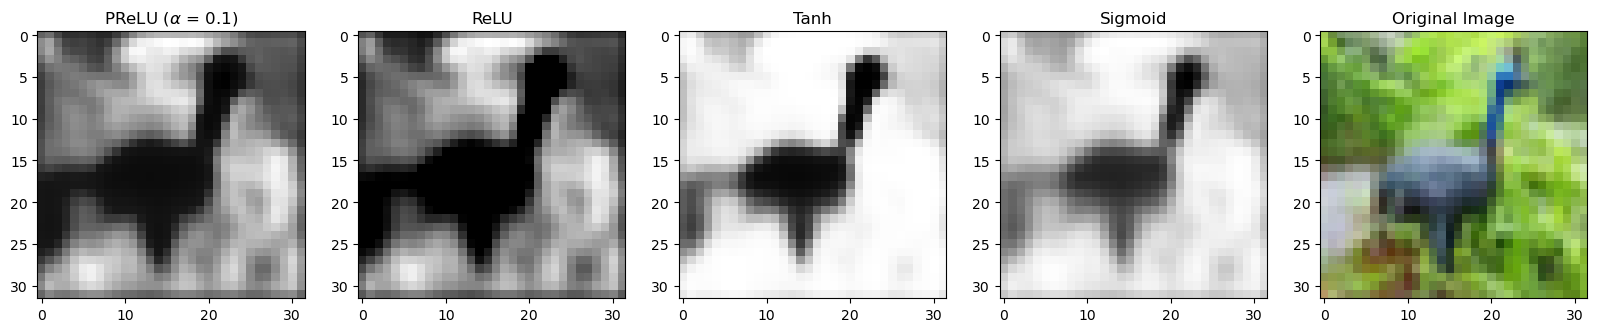

In [3]:
img = plt.imread("cifar10/cifar10/train/bird/0001.png")
## Edge Detection Kernel
kernel = np.array([[[1,0,-1],[1,0,-1],[1,0,-1]],[[1,0,-1],[1,0,-1],[1,0,-1]],[[1,0,-1],[1,0,-1],[1,0,-1]]])
output_prelu = convolve(img,kernel,1,1,'prelu')
output_relu = convolve(img,kernel,1,1,'relu')
output_tanh = convolve(img,kernel,1,1,'tanh')
output_sigmoid = convolve(img,kernel,1,1,'sigmoid')


## Display Kernel
print('Kernel')
print(kernel)
## Display Output
plt.figure(figsize=(20,10))
plt.subplot(1,5,1)
plt.imshow(output_prelu,cmap='gray')
plt.title(r'PReLU ($\alpha$ = 0.1)')
plt.subplot(1,5,2)
plt.imshow(output_relu,cmap='gray')
plt.title('ReLU')
plt.subplot(1,5,3)
plt.imshow(output_tanh,cmap='gray')
plt.title('Tanh')
plt.subplot(1,5,4)
plt.imshow(output_sigmoid,cmap='gray')
plt.title('Sigmoid')
plt.subplot(1,5,5)
plt.imshow(img)
plt.title('Original Image')
plt.show()


## POOLING FUNCTION

In [4]:
def Pooling(image,pooling_function ='max', stride = 2):
    '''
        image: numpy array of shape (image_height,image_width)
        pooling_function: str
        stride: int
    '''
    assert type(stride) == int
   
    image_height = image.shape[0]
    image_width = image.shape[1]

    output_height = image_height//stride
    output_width = image_width//stride

    output = np.zeros((output_height,output_width))

    for i in range(0,image_height,stride):
        for j in range(0,image_width,stride):
            if pooling_function == 'max':
                output[i//stride,j//stride] = np.max(image[i:i+stride,j:j+stride])
            elif pooling_function == 'average':
                output[i//stride,j//stride] = np.mean(image[i:i+stride,j:j+stride])

    return output        

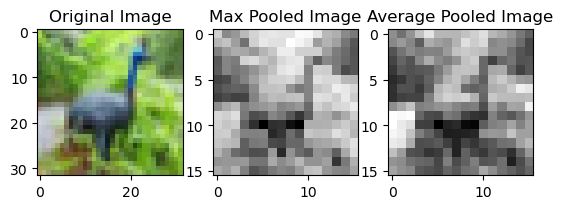

In [5]:
max_pooled_output = Pooling(img,pooling_function='max',stride = 2)
avg_pooled_output = Pooling(img,pooling_function='average',stride = 2)
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(max_pooled_output,cmap = 'gray')
plt.title('Max Pooled Image')
plt.subplot(1,3,3)
plt.imshow(avg_pooled_output,cmap = 'gray')
plt.title('Average Pooled Image')
plt.show()


## CONVOLUTIONAL LAYER

In [6]:
def ConvLayer(input,filters,stride = 1,padding = 1,activation = 'relu',alpha = 0.1):
    
    '''
    input : numpy array of shape (height,width,channels)
    filters : numpy array of shape (number of filters,height,width,channels)
    stride : int
    padding : int
    activation : string
    alpha : float(Parametric Relu)
    '''
    assert type(stride) == int
    assert type(padding) == int

    
    num_channels = filters.shape[-1]

    assert num_channels == input.shape[-1]

    num_filters = filters.shape[0]

    output = []

    for i in range(num_filters):
        output.append(convolve(input,filters[i],stride,padding,activation,alpha))

    output = np.array(output)
    output = np.transpose(output,(1,2,0))
    return output

Input Image Shape :  (32, 32, 3)
Filter Shape :  (4, 3, 3, 3)
Output Image Shape :  (32, 32, 4)
Four Filters used for illustration


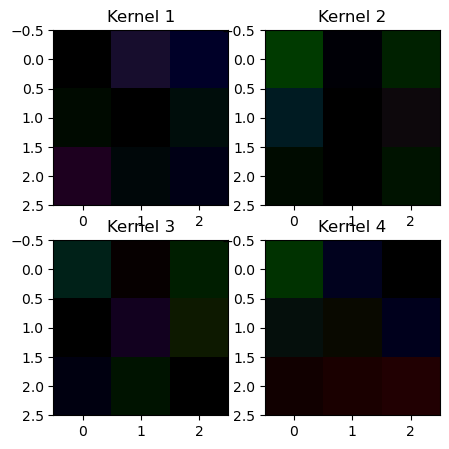

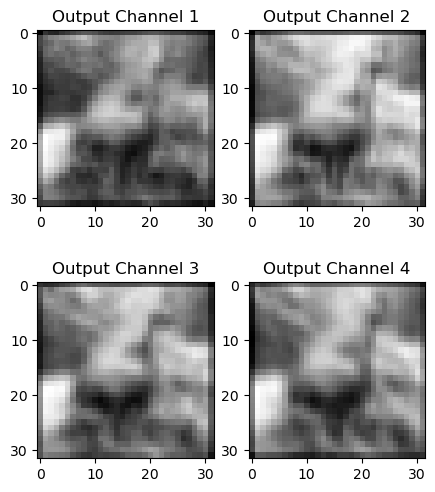

In [7]:

filters = np.random.randn(4,3,3,3)*0.1
#Clipping for display
filters = np.clip(filters,0,1)
convolved_output = ConvLayer(img,filters)

print("Input Image Shape : ",img.shape)
print("Filter Shape : ",filters.shape)
print("Output Image Shape : ",convolved_output.shape)

print('Four Filters used for illustration')
## Display each kernel
plt.figure(figsize = (5,5))
for i in range(filters.shape[0]):
    plt.subplot(2,2,i+1)
    plt.imshow(filters[i])
    plt.title('Kernel {}'.format(i+1))

## Display each output channel
plt.figure(figsize = (5,6))
for i in range(convolved_output.shape[-1]):
    plt.subplot(2,2,i+1)
    plt.imshow(convolved_output[:,:,i],cmap = 'gray')
    plt.title('Output Channel {}'.format(i+1))


## POOLING LAYER

In [8]:
def PoolingLayer(input,pooling_function = 'max',stride = 2):

    '''
    input : numpy array of shape (height,width,channels)
    pooling_function : string
    stride : int
    '''

    assert type(stride) == int

    num_channels = input.shape[-1]

    output = []
    
    for i in range(num_channels):
        output.append(Pooling(input[:,:,i],pooling_function,stride))
   
    output = np.array(output)
    return output

In [9]:
activation_map = np.random.randn(4,4,4)*0.1
output = PoolingLayer(activation_map)

print("Input Activation Map Shape : ",activation_map.shape)
print("Output Activation Map Shape : ",output.shape)

print('Input Activation Map')
print(activation_map)

print('Output Activation Map')
print(output)


Input Activation Map Shape :  (4, 4, 4)
Output Activation Map Shape :  (4, 2, 2)
Input Activation Map
[[[-0.04664492  0.08713799  0.08336394  0.14860428]
  [-0.09365345  0.02764581  0.04124046 -0.07107204]
  [ 0.08025648  0.16997069 -0.06767625 -0.08550603]
  [ 0.02073108 -0.06574356 -0.00568077 -0.0466819 ]]

 [[ 0.08940187 -0.07005137 -0.11940948 -0.13391845]
  [ 0.11474083 -0.01947231  0.03760513  0.16046998]
  [-0.20111612 -0.07439223  0.02362376 -0.04577543]
  [-0.12426032 -0.0145398   0.15016732  0.11065341]]

 [[-0.10242598 -0.09482131 -0.04701917 -0.16918453]
  [ 0.07427745  0.11598473  0.05796517 -0.10868818]
  [ 0.09993428  0.11112998 -0.01242426 -0.08818881]
  [ 0.01609011 -0.21246965 -0.19390358 -0.09561322]]

 [[ 0.09677447 -0.0186103  -0.03756977  0.01307166]
  [-0.08431909  0.06500726 -0.02999538  0.05405409]
  [-0.12928709  0.18168096  0.10134613 -0.04457826]
  [ 0.03825822  0.05387225 -0.09431088 -0.05079947]]]
Output Activation Map
[[[ 0.11474083  0.08025648]
  [ 0.09

## FLATTENING (UNRAVELLING) FUNCTION

In [10]:
def FlatteningLayer(input,output_shape):
    '''
    input : numpy array of shape (channels,height,width)
    output_shape : int (size of flattened vector)
    '''
    assert type(output_shape) == int

    output = input.reshape(input.shape[0]*input.shape[1]*input.shape[2])

    weight_matrix = np.random.randn(output_shape,output.shape[0])
    output = np.matmul(weight_matrix,output)

    return output


## MLP LAYER

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def MLP(input,num_hidden,hidden_layers,activation,output_size,weights,biases):
    '''
    input : numpy array of shape (in_shape,)
    num_hidden : int (number of hidden layers)
    hidden_layers : list (number of neurons in each hidden layer)
    activation : string (activation function)
    output_size : int (output size)
    '''

    assert type(num_hidden) == int
    assert type(hidden_layers) == list
    assert type(output_size) == int


    outputs = []
    input = input.reshape(input.shape[0],1)
    for i in range(num_hidden):
    
        output = np.dot(weights[i],input) + biases[i]
        if activation == 'sigmoid':
            output = 1/(1+np.exp(-output))
        elif activation == 'tanh':
            output = np.tanh(output)
        elif activation == 'relu':
            output = np.maximum(0,output)

        input = output
        outputs.append(output)

    final_output = np.matmul(weights[-1],outputs[-1]) + biases[-1]
    softmax = np.exp(final_output)/np.sum(np.exp(final_output))

    return softmax,final_output


### Testing the MLP

In [12]:
input = np.random.randn(1000)
hidden_layers = [400,100]

weights = []
weights.append(np.random.randn(hidden_layers[0],input.shape[0]))
for i in range(1,len(hidden_layers)):
    weights.append(np.random.randn(hidden_layers[i],hidden_layers[i-1]))
weights.append(np.random.randn(10,hidden_layers[-1]))

biases = []
biases.append(np.random.randn(hidden_layers[0],1))
for i in range(1,len(hidden_layers)):
    biases.append(np.random.randn(hidden_layers[i],1))
biases.append(np.random.randn(10,1))

softmax,final_output = MLP(input,2,hidden_layers,'sigmoid',10,weights,biases)

print(f'Output Shape of MLP : {softmax.shape}')

Output Shape of MLP : (10, 1)


## FEED FORWARD PATH

In [13]:
def feed_forward_path(image,filters_1,filters_2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size):


    x = ConvLayer(image,filters_1,stride = 1,padding = 1,activation = 'sigmoid')
    x = PoolingLayer(x,pooling_function='max',stride = 2)
    
    x = ConvLayer(x,filters_2,stride = 1,padding = 1,activation = 'sigmoid')
    x = PoolingLayer(x,pooling_function='max',stride = 2)
    
    flat_output = FlatteningLayer(x,1000)
    softmax,x = MLP(flat_output,num_hidden,hidden_layers,activation = 'sigmoid',output_size = output_size,weights = weights,biases = biases)

    return softmax,x,flat_output
    

## INITIALIZATION OF WEIGHTS AND BIASES, FILTERS
#### PARAMETERS AS PER SPECIFICATIONS IN THE QUESTION

In [14]:
hidden_layers = [200]
num_hidden = 1
output_size = 10
mlp_input_size = 1000
# 16 filters of size 3x3x3
filters1 = np.random.randn(16,3,3,3)
# 8 filters of size 3x3x16
filters2 = np.random.randn(8,3,3,16)

weights = []
biases = []

weights.append(np.random.randn(hidden_layers[0],mlp_input_size))
biases.append(np.random.randn(hidden_layers[0],1))

for i in range(1,num_hidden):
    weights.append(np.random.randn(hidden_layers[i],hidden_layers[i-1]))
    biases.append(np.random.randn(hidden_layers[i],1))

weights.append(np.random.randn(output_size,hidden_layers[-1]))
biases.append(np.random.randn(output_size,1))


In [15]:
softmax,output,_ = feed_forward_path(img,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)

In [16]:
print(f'Output of MLP : {output}')
print(f'Softmax Output : {softmax}')

Output of MLP : [[  2.9482375 ]
 [ -2.97380379]
 [ -5.318355  ]
 [-14.70414797]
 [  1.25377402]
 [  5.78298997]
 [-14.83849112]
 [  9.52805748]
 [  9.43969804]
 [  6.03300231]]
Softmax Output : [[7.04239915e-04]
 [1.88716895e-06]
 [1.80961059e-07]
 [1.51840293e-11]
 [1.29367295e-04]
 [1.19905192e-02]
 [1.32752450e-11]
 [5.07341214e-01]
 [4.64436270e-01]
 [1.53963215e-02]]


## EXPERIMENTING WITH DIFFERENT CLASSES OF CIFAR10 DATASET

In [17]:
aeroplane_1 = plt.imread("cifar10/cifar10/train/airplane/0001.png")
automobile_1 = plt.imread("cifar10/cifar10/train/automobile/0001.png")
bird_1 = plt.imread("cifar10/cifar10/train/bird/0001.png")
cat_1 = plt.imread("cifar10/cifar10/train/cat/0001.png")
deer_1 = plt.imread("cifar10/cifar10/train/deer/0001.png")
dog_1 = plt.imread("cifar10/cifar10/train/dog/0001.png")
frog_1 = plt.imread("cifar10/cifar10/train/frog/0001.png")
horse_1 = plt.imread("cifar10/cifar10/train/horse/0001.png")
ship_1 = plt.imread("cifar10/cifar10/train/ship/0001.png")
truck_1 = plt.imread("cifar10/cifar10/train/truck/0001.png")

images1 = [aeroplane_1,automobile_1,bird_1,cat_1,deer_1,dog_1,frog_1,horse_1,ship_1,truck_1]
classes = ['aeroplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

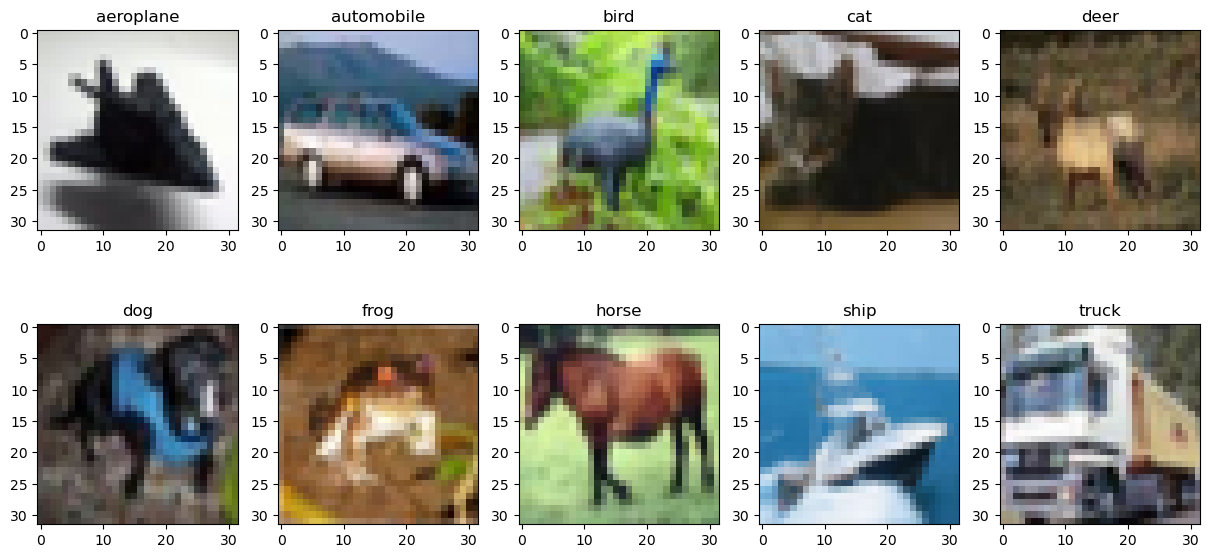

In [18]:
plt.figure(figsize = (15,7))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images1[i])
    plt.title(classes[i])


## DISPLAYING OUTPUT FOR EACH OF THE IMAGES

In [19]:
softmax,output,flat_aero = feed_forward_path(aeroplane_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[2.20308996e-05]
 [3.09339412e-10]
 [9.20354552e-12]
 [1.51189025e-17]
 [1.15978545e-04]
 [9.99860664e-01]
 [1.97492021e-17]
 [8.12441779e-09]
 [1.31789253e-06]
 [9.35227503e-12]]
Prediction dog


In [20]:
softmax,output,flat_auto = feed_forward_path(automobile_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[4.14477524e-06]
 [5.39404069e-12]
 [1.10722633e-10]
 [8.72483764e-15]
 [9.99804931e-01]
 [1.89813864e-04]
 [2.09598081e-17]
 [1.09686060e-06]
 [1.29371668e-08]
 [6.99622275e-11]]
Prediction deer


In [21]:
softmax,output,flat_bird = feed_forward_path(bird_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[5.90612784e-09]
 [8.77517296e-09]
 [3.51017852e-10]
 [1.34118469e-14]
 [9.64928009e-01]
 [1.42482443e-02]
 [6.12659448e-15]
 [2.08237313e-02]
 [3.06935747e-10]
 [2.61913123e-10]]
Prediction deer


In [22]:
softmax,output,flat_cat = feed_forward_path(cat_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[7.85299481e-05]
 [9.98124137e-01]
 [1.38990018e-06]
 [6.47741104e-11]
 [6.52122721e-04]
 [8.54882050e-05]
 [1.47074841e-07]
 [3.61911737e-08]
 [3.21988414e-04]
 [7.36160877e-04]]
Prediction automobile


In [23]:
softmax,output,flat_deer = feed_forward_path(deer_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[6.96003262e-05]
 [1.54563988e-03]
 [6.11708774e-10]
 [6.30440583e-14]
 [5.60032566e-05]
 [9.98327881e-01]
 [4.83005093e-10]
 [1.13307795e-10]
 [1.31592334e-13]
 [8.74204974e-07]]
Prediction dog


In [24]:
softmax,output,flat_dog = feed_forward_path(dog_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[1.21911565e-08]
 [5.98547000e-14]
 [1.46002878e-03]
 [2.43076750e-14]
 [2.58204287e-07]
 [9.98539586e-01]
 [7.82335528e-14]
 [1.14080905e-07]
 [7.70049738e-10]
 [4.58377286e-11]]
Prediction dog


In [25]:
softmax,output,flat_frog = feed_forward_path(frog_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[1.19227438e-03]
 [2.80055198e-04]
 [4.31223772e-08]
 [1.06493089e-13]
 [6.92225737e-12]
 [8.47481802e-01]
 [5.71930554e-14]
 [8.30225503e-10]
 [1.51045824e-01]
 [5.46455287e-10]]
Prediction dog


In [26]:
softmax,output,flat_horse = feed_forward_path(horse_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[1.00600924e-03]
 [1.50591437e-07]
 [5.23994231e-02]
 [4.44863303e-19]
 [8.97325713e-02]
 [8.56861803e-01]
 [2.41042377e-14]
 [6.50313060e-09]
 [3.58834743e-08]
 [1.08645865e-11]]
Prediction dog


In [27]:
softmax,output,flat_ship = feed_forward_path(ship_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[6.85256878e-01]
 [6.73879469e-06]
 [6.30927404e-06]
 [1.66375266e-08]
 [1.23817249e-05]
 [3.14712388e-01]
 [3.59608382e-11]
 [3.51181564e-11]
 [5.04173856e-06]
 [2.46055952e-07]]
Prediction aeroplane


In [28]:
softmax,output,flat_truck = feed_forward_path(truck_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
print(f'softmax :{softmax}')
print(f'Prediction {classes[np.argmax(softmax)]}')

softmax :[[3.79088099e-04]
 [3.35705785e-02]
 [9.44209303e-08]
 [6.59002610e-11]
 [1.19603587e-09]
 [9.66046497e-01]
 [1.23074691e-14]
 [5.11745235e-07]
 [4.51416010e-09]
 [3.22416121e-06]]
Prediction dog


### There is no particular trend in the output of the Feed Forward Network. But we do observe that many predictions are aeroplanes and ships. This could be because of skewed initialisations

## TSNE Visualization of BottleNeck Layer (Output of Flattening Function)

In [29]:
aeroplane_2 = plt.imread("cifar10/cifar10/train/airplane/0002.png")
automobile_2 = plt.imread("cifar10/cifar10/train/automobile/0002.png")
bird_2 = plt.imread("cifar10/cifar10/train/bird/0002.png")
cat_2 = plt.imread("cifar10/cifar10/train/cat/0002.png")
deer_2 = plt.imread("cifar10/cifar10/train/deer/0002.png")
dog_2 = plt.imread("cifar10/cifar10/train/dog/0002.png")
frog_2 = plt.imread("cifar10/cifar10/train/frog/0002.png")
horse_2 = plt.imread("cifar10/cifar10/train/horse/0002.png")
ship_2 = plt.imread("cifar10/cifar10/train/ship/0002.png")
truck_2 = plt.imread("cifar10/cifar10/train/truck/0002.png")

aeroplane_3 = plt.imread("cifar10/cifar10/train/airplane/0003.png")
automobile_3 = plt.imread("cifar10/cifar10/train/automobile/0003.png")
bird_3 = plt.imread("cifar10/cifar10/train/bird/0003.png")
cat_3 = plt.imread("cifar10/cifar10/train/cat/0003.png")
deer_3 = plt.imread("cifar10/cifar10/train/deer/0003.png")
dog_3 = plt.imread("cifar10/cifar10/train/dog/0003.png")
frog_3 = plt.imread("cifar10/cifar10/train/frog/0003.png")
horse_3 = plt.imread("cifar10/cifar10/train/horse/0003.png")
ship_3 = plt.imread("cifar10/cifar10/train/ship/0003.png")
truck_3 = plt.imread("cifar10/cifar10/train/truck/0003.png")

images_2 = [aeroplane_2,automobile_2,bird_2,cat_2,deer_2,dog_2,frog_2,horse_2,ship_2,truck_2]
images_3 = [aeroplane_3,automobile_3,bird_3,cat_3,deer_3,dog_3,frog_3,horse_3,ship_3,truck_3]

In [30]:
_,_,flat_aero_1 = feed_forward_path(aeroplane_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_auto_1 = feed_forward_path(automobile_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_bird_1 = feed_forward_path(bird_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_cat_1 = feed_forward_path(cat_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_deer_1 = feed_forward_path(deer_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_dog_1 = feed_forward_path(dog_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_frog_1 = feed_forward_path(frog_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_horse_1 = feed_forward_path(horse_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_ship_1 = feed_forward_path(ship_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_truck_1 = feed_forward_path(truck_1,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)

_,_,flat_aero_2 = feed_forward_path(aeroplane_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_auto_2 = feed_forward_path(automobile_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_bird_2 = feed_forward_path(bird_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_cat_2 = feed_forward_path(cat_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_deer_2 = feed_forward_path(deer_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_dog_2 = feed_forward_path(dog_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_frog_2 = feed_forward_path(frog_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_horse_2 = feed_forward_path(horse_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_ship_2 = feed_forward_path(ship_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_truck_2 = feed_forward_path(truck_2,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)

_,_,flat_aero_3 = feed_forward_path(aeroplane_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_auto_3 = feed_forward_path(automobile_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_bird_3 = feed_forward_path(bird_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_cat_3 = feed_forward_path(cat_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_deer_3 = feed_forward_path(deer_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_dog_3 = feed_forward_path(dog_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_frog_3 = feed_forward_path(frog_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_horse_3 = feed_forward_path(horse_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_ship_3 = feed_forward_path(ship_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)
_,_,flat_truck_3 = feed_forward_path(truck_3,filters1,filters2,weights,biases,hidden_layers,num_hidden,output_size,mlp_input_size)

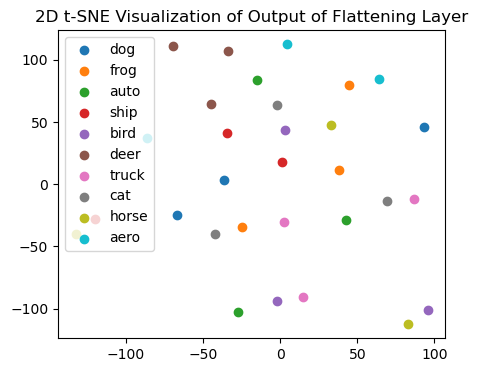

In [31]:
from sklearn.manifold import TSNE

data = np.vstack([
    flat_aero_1.reshape(1, -1), flat_auto_1.reshape(1, -1), flat_bird_1.reshape(1, -1), flat_cat_1.reshape(1, -1), flat_deer_1.reshape(1, -1), 
    flat_dog_1.reshape(1, -1), flat_frog_1.reshape(1, -1), flat_horse_1.reshape(1, -1), flat_ship_1.reshape(1, -1), flat_truck_1.reshape(1, -1),
    flat_aero_2.reshape(1, -1), flat_auto_2.reshape(1, -1), flat_bird_2.reshape(1, -1),flat_cat_2.reshape(1, -1), flat_deer_2.reshape(1, -1),
    flat_dog_2.reshape(1, -1), flat_frog_2.reshape(1, -1),flat_horse_2.reshape(1, -1),flat_ship_2.reshape(1, -1),flat_truck_2.reshape(1, -1),
    flat_aero_3.reshape(1, -1), flat_auto_3.reshape(1, -1),flat_bird_3.reshape(1, -1),flat_cat_3.reshape(1, -1),flat_deer_3.reshape(1, -1),
    flat_dog_3.reshape(1, -1),flat_frog_3.reshape(1, -1),flat_horse_3.reshape(1, -1),flat_ship_3.reshape(1, -1),flat_truck_3.reshape(1, -1)
])

labels = ['aero', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'] * 3


tsne = TSNE(n_components=2, perplexity=5)  
transformed_data = tsne.fit_transform(data)

x = transformed_data[:, 0]
y = transformed_data[:, 1]

plt.figure(figsize=(5, 4))

for label in set(labels):
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(x[idx], y[idx], label=label)

plt.legend()
plt.title('2D t-SNE Visualization of Output of Flattening Layer')
plt.show()


#### No clear clusters are formed. Just the initial weights are not able to discriminate between the classes